In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
df = pd.read_csv("collisions_cleaned.csv", low_memory=False)

In [3]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,0:00,BRONX,10458.0,40.866047,-73.882744,"(40.866047,-73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,17614.0,0.093326,40.87,-73.88
1,03/24/2017,0:00,BROOKLYN,11220.0,40.633470,-74.021020,"(40.63347,-74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,3659.0,0.149753,40.63,-74.02
2,03/24/2017,0:00,BROOKLYN,11222.0,40.728416,-73.952415,"(40.728416,-73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,33440.0,0.016386,40.73,-73.95
3,03/24/2017,0:00,QUEENS,11104.0,40.748928,-73.913750,"(40.748928,-73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,6428.0,0.255730,40.75,-73.91
4,03/24/2017,0:00,QUEENS,11354.0,40.766445,-73.834040,"(40.766445,-73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,5054.0,0.108418,40.77,-73.83


In [4]:
mask = df['VEHICLE TYPE CODE 1'] == 'BICYCLE'
mask2 = df['VEHICLE TYPE CODE 2'] == 'BICYCLE'
df[mask | mask2]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
50,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.952380,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.000000,0.003503,40.59,-73.95
169,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.968230,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.000000,0.110987,40.68,-73.97
208,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.883470,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.000000,0.376724,40.88,-73.88
266,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.994590,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.000000,0.136958,40.71,-73.99
274,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.936230,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.000000,0.182892,40.81,-73.94
278,03/24/2017,19:15,QUEENS,11379.0,40.713287,-73.871630,"(40.713287,-73.87163)",METROPOLITAN AVENUE,80 STREET,NaN,1,0,0,0,1,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,3638969,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,14068.312786,0.038949,40.71,-73.87
353,03/24/2017,22:30,MANHATTAN,10128,40.780437,-73.949890,"(40.780437,-73.94989)",2 AVENUE,NaN,NaN,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639744,BICYCLE,BICYCLE,NaN,NaN,NaN,12856.000000,0.085243,40.78,-73.95
404,03/24/2017,6:45,QUEENS,11377,40.753323,-73.906690,"(40.753323,-73.90669)",NORTHERN BOULEVARD,NaN,NaN,1,0,0,0,1,0,0,0,Traffic Control Disregarded,Failure to Yield Right-of-Way,NaN,NaN,NaN,3638316,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,6428.000000,0.085243,40.75,-73.91
427,03/24/2017,8:00,MANHATTAN,10035.0,40.808033,-73.940125,"(40.808033,-73.940125)",NaN,NaN,15 EAST 128 STREET,1,0,0,0,1,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3638485,BICYCLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,11984.000000,0.045723,40.81,-73.94
454,03/24/2017,9:00,MANHATTAN,10001.0,40.747234,-73.993370,"(40.747234,-73.99337)",WEST 28 STREET,7 AVENUE,NaN,1,0,0,0,1,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,3638923,BICYCLE,TAXI,NaN,NaN,NaN,7588.000000,0.216636,40.75,-73.99


In [5]:
bike_coll = df[(df['VEHICLE TYPE CODE 1'] == 'BICYCLE') | (df['VEHICLE TYPE CODE 2'] == 'BICYCLE') | (df['VEHICLE TYPE CODE 3'] == 'BICYCLE') | (df['VEHICLE TYPE CODE 4'] == 'BICYCLE') | (df['VEHICLE TYPE CODE 5'] == 'BICYCLE')]

In [6]:
len(bike_coll)

21185

In [7]:
bike_coll = bike_coll.reset_index(drop=True)
bike_coll.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.0,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.0,0.110987,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.376724,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.0,0.136958,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.0,0.182892,40.81,-73.94


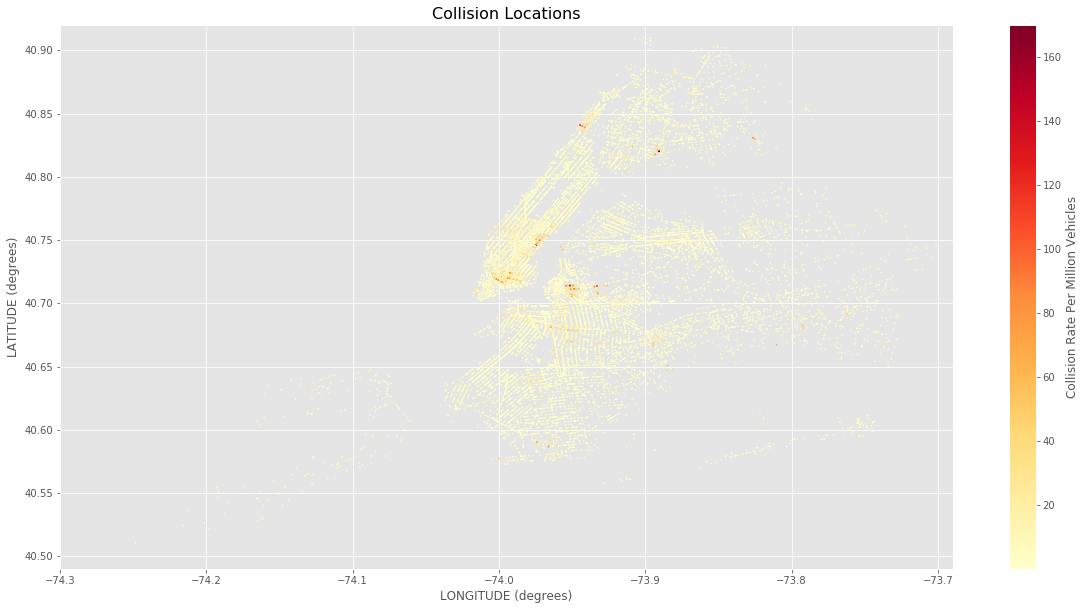

In [8]:
plt.scatter(bike_coll['LONGITUDE'], bike_coll['LATITUDE'], c=bike_coll['Collision Rate'], s=1, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [10]:
counts = bike_coll.groupby('LOCATION').count()
counts.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
LOCATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(40.5105181,-74.2482769)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
"(40.5214301,-74.1982316)",1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1
"(40.5239568,-74.2156736)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
"(40.5262662,-74.2015265)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
"(40.5279085,-74.1648546)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1


In [11]:
for x in range (0,len(bike_coll)):
    bike_coll.at[x,'Collision Rate'] = (counts.at[bike_coll.at[x,'LOCATION'],'DATE']*1000000)/(bike_coll.at[x,'Counts']*365*5)

In [12]:
bike_coll.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.0,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.0,0.055494,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.188362,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.0,0.022826,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.0,0.045723,40.81,-73.94


In [13]:
print(bike_coll['Collision Rate'].min())
print(bike_coll['Collision Rate'].max())

0.00314558515158
18.9290161893


In [73]:
bike_coll.to_csv('bike_coll_rate.csv', index=False)

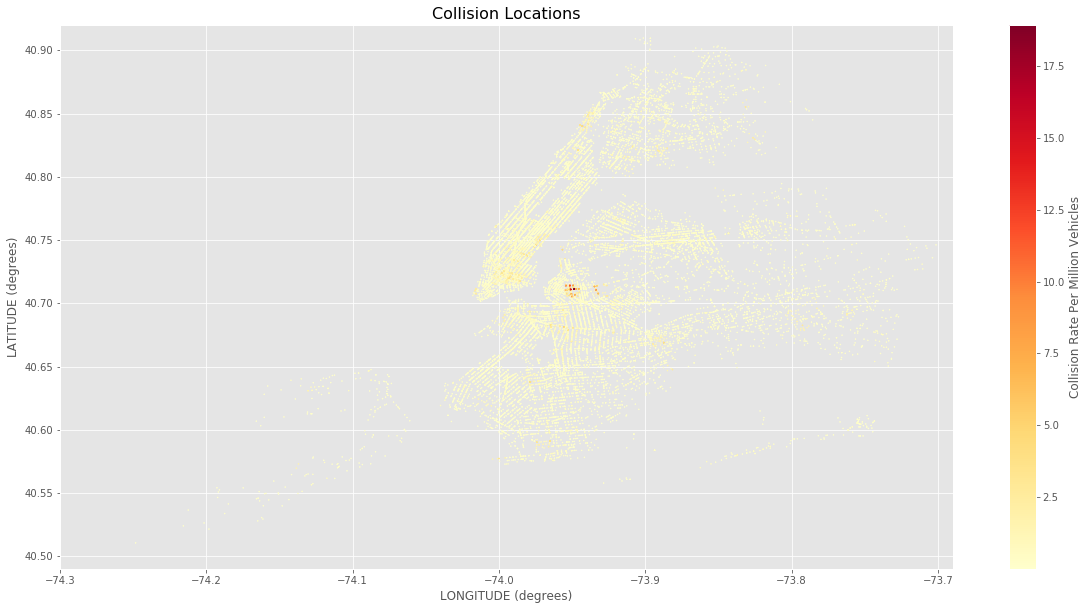

In [14]:
plt.scatter(bike_coll['LONGITUDE'], bike_coll['LATITUDE'], c=bike_coll['Collision Rate'], s=1, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()